In [1]:
#from f3dasm import ExperimentData
import numpy as np
from pathlib import Path
import pandas as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures # For Polynomial basis functions
from sklearn.pipeline import make_pipeline # to link different objects
from matplotlib import cm # to change colors of surface plots
import matplotlib.pyplot as plt # import plotting tools to create figures

In [2]:
# Let's create a function defining our Artificial Neural Network.
from tensorflow import keras # fast library for ANNs
from tensorflow.keras.optimizers import Adam # import the optimizer you want to use to calculate the parameters
from keras.models import Sequential # to create a feedforward neural network
from keras.layers import Dense # to create a feedforward neural network with dense layers
#
# Function to create the ANN model (in this case we are creating )
def create_ANN(input_dimensions=1, # number of input variables
               neurons1=3, # number of neurons in first hidden layer
               neurons2=2, # number of neurons in second hidden layer
               activation='relu', # activation function
               optimizer='adam', # optimization algorithm to compute the weights and biases
               output_dimensions=1,
               output_activation='linear'): # number of output variables
    # create model
    model = Sequential() # Feedforward architecture
    model.add(Dense(neurons1, input_dim=input_dimensions, activation=activation)) # first hidden layer
    model.add(Dense(neurons2, activation=activation)) # second hidden layer
    model.add(Dense(output_dimensions, activation=output_activation)) # output layer using Linear activation function because
                                                             # we are doing regression (we could also ommit the
                                                             # activation='linear' command because keras
                                                             # would pick the right activation function
                                                             # when we ask for the correct loss below)
    model.compile(loss='mse', # our NLL (loss or error function)
                  optimizer=optimizer)
    return model

In [3]:
df_in_7d = pd.read_csv('data/supercompressible_7d_input.csv')
df_out_7d = pd.read_csv('data/supercompressible_7d_output.csv')

df_in_3d = pd.read_csv('data/supercompressible_3d_input.csv')
df_out_3d = pd.read_csv('data/supercompressible_3d_output.csv')

X_3d = df_in_3d.loc[:, ['ratio_d','ratio_pitch','ratio_top_diameter'] ].values
Y_3d_class = df_out_3d.loc[:, 'coilable'].values
Y_3d_reg = df_out_3d.loc[:,['sigma_crit','energy']].values

In [4]:
# # define a function to do the preprocessing
# # Input: input_raw_data, output_raw_data, problem_class
# # input_raw_data: pandas dataframe for input
# # output_raw_data: pandas dataframe for output
# # problem_class: (booler) to describe this preprocess is for classification problem or not
# #                this will lead to different scaler for Y data.
# #
# # Output: X_train_scale, X_test_scale, X_scale, Y_train_scale, Y_test_scale, Y_scale, scaler_x, scaler_y
# # scaler_x: (scaler) used to do inverse_transfer after prediction
# # scaler_y: (scaler) used to do inverse_transfer after prediction

# def preprocess_3d(input_raw_data,output_raw_data,problem_class):
#     if problem_class == False:
#         raw_data = pd.concat([input_raw_data, output_raw_data], axis=1)

#         # look at the # of missing points in the first ten columns
#         raw_data_drop_nan = raw_data.dropna()

#         X_3d = raw_data_drop_nan.loc[:, ['ratio_d','ratio_pitch','ratio_top_diameter'] ].values
#         Y_3d = raw_data_drop_nan.loc[:, ['sigma_crit','energy'] ].values
        
#         from sklearn.model_selection import train_test_split
#         testset_ratio = 0.25
#         SEED = 123
#         X_train, X_test, Y_train, Y_test = train_test_split(X_3d,
#                                             Y_3d, test_size=testset_ratio,
#                                             random_state=SEED)

#         from sklearn.preprocessing import StandardScaler
#         scaler_x = StandardScaler()
#         scaler_x.fit(X_train)
#         X_train_scale=scaler_x.transform(X_train)
#         X_test_scale=scaler_x.transform(X_test)
#         X_scale=scaler_x.transform(X_3d)
        
#         scaler_y = StandardScaler()
#         scaler_y.fit(Y_train)
#         Y_train_scale = scaler_y.transform(Y_train)
#         Y_test_scale = scaler_y.transform(Y_test)
#         Y_scale = scaler_y.transform(Y_3d)
#     else:
#         X_3d = input_raw_data.loc[:, ['ratio_d','ratio_pitch','ratio_top_diameter'] ].values
#         Y_3d = output_raw_data.loc[:, 'coilable'].values
#         from sklearn.model_selection import train_test_split
#         testset_ratio = 0.25
#         SEED = 123
#         X_train, X_test, Y_train, Y_test = train_test_split(X_3d,
#                                             Y_3d, test_size=testset_ratio,
#                                             random_state=SEED)

#         from sklearn.preprocessing import StandardScaler, FunctionTransformer
#         scaler_x = StandardScaler()
#         scaler_x.fit(X_train)
#         X_train_scale=scaler_x.transform(X_train)
#         X_test_scale=scaler_x.transform(X_test)
#         X_scale=scaler_x.transform(X_3d)

#         scaler_y = FunctionTransformer() # FunctionTransformer without input will give a Identity scaler
#         Y_train_scale = scaler_y.transform(Y_train)
#         Y_test_scale = scaler_y.transform(Y_test)
#         Y_scale = scaler_y.transform(Y_3d)

#     return X_train_scale, X_test_scale, X_scale, Y_train_scale, Y_test_scale, Y_scale, scaler_x, scaler_y

In [5]:
# X_train_scale_class, X_test_scale_class, X_scale_class, Y_train_scale_class, Y_test_scale_class, Y_scale_class, scaler_x_class, scaler_y_class = preprocess_3d(df_in_3d,df_out_3d,True)
# X_train_scale_regression, X_test_scale_regression, X_scale_regression, Y_train_scale_regression, Y_test_scale_regression, Y_scale_regression, scaler_x_regression, scaler_y_regression = preprocess_3d(df_in_3d,df_out_3d,False)

In [6]:
# Loading the data
domain_3 = pd.read_pickle("data/supercompressible_3d_domain.pkl")
input_3 = pd.read_csv("data/supercompressible_3d_input.csv", index_col=0)
jobs_3 = pd.read_pickle("data/supercompressible_3d_jobs.pkl")
output_3 = pd.read_csv("data/supercompressible_3d_output.csv", index_col=0)

domain_7 = pd.read_pickle("data/supercompressible_7d_domain.pkl")
input_7 = pd.read_csv("data/supercompressible_7d_input.csv", index_col=0)
jobs_7 = pd.read_pickle("data/supercompressible_7d_jobs.pkl")
output_7 = pd.read_csv("data/supercompressible_7d_output.csv", index_col=0)

2023-12-05 14:20:09,174 - f3dasm - INFO - Imported f3dasm (version: 1.4.3)


In [7]:
from sklearn.model_selection import train_test_split

testset_ratio = 0.25
SEED = 123
DIM = 3
if DIM == 2:
    output_3.coilable = output_3.coilable.astype(bool).astype(int)
X_train, X_test, y_train, y_test = train_test_split(input_3, output_3["coilable"].values, test_size=testset_ratio, random_state=SEED)

# Class-dimensional y train and test
Y_train = np.zeros([len(y_train), 3])
for i in range(len(y_train)):
    Y_train[i][y_train[i]] = 1
    
Y_test = np.zeros([len(y_test), 3])
for i in range(len(y_test)):
    Y_test[i][y_test[i]] = 1

# Standardizing your dataset is good practice and can be important for ANNs!
from sklearn.preprocessing import StandardScaler # standardize the dataset with scikit-learn
#
scaler = StandardScaler().fit(X_train) # Check scikit-learn to see what this does!
#
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#


In [8]:
import scikeras
from scikeras.wrappers import KerasRegressor
#from tensorflow.keras import KerasRegressor # a new version will use scikeras
# Now create your first ANN model!
neurons1=64 # number of neurons for the first hidden layer
neurons2=32 # number of neurons for the second hidden layer
activation='relu' # choose activation function
batch_size = 2500 # considering the entire dataset for updating the weights and biases in each epoch
epochs = 500  # number of times we train the neural network with the entire training set
optimizer = Adam(learning_rate=0.001) # specifying the learning rate value for the optimizer (PLAY WITH THIS!)
ANN_model = KerasRegressor(model=create_ANN, input_dimensions=len(X_train.columns), neurons1=neurons1, neurons2=neurons2,
                           activation=activation, batch_size=batch_size, epochs=epochs,
                           optimizer=optimizer, output_dimensions=3, output_activation='sigmoid')

In [9]:
ANN_model

KerasRegressor(
	model=<function create_ANN at 0x000001A8B2601EA0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x000001A8C14DF0D0>
	loss=None
	metrics=None
	batch_size=2500
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=500
	input_dimensions=3
	neurons1=64
	neurons2=32
	activation=relu
	output_dimensions=3
	output_activation=sigmoid
)

In [10]:
# Now that we created our first ANN model, let's fit it to our (scaled) dataset!
history = ANN_model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test))

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.2474 - val_loss: 0.2458
Epoch 2/500
1/1 [==============================] - 0s 67ms/step - loss: 0.2439 - val_loss: 0.2424
Epoch 3/500
1/1 [==============================] - 0s 75ms/step - loss: 0.2404 - val_loss: 0.2391
Epoch 4/500
1/1 [==============================] - 0s 70ms/step - loss: 0.2370 - val_loss: 0.2359
Epoch 5/500
1/1 [==============================] - 0s 72ms/step - loss: 0.2337 - val_loss: 0.2328
Epoch 6/500
1/1 [==============================] - 0s 73ms/step - loss: 0.2305 - val_loss: 0.2297
Epoch 7/500
1/1 [==============================] - 0s 74ms/step - loss: 0.2274 - val_loss: 0.2267
Epoch 8/500
1/1 [==============================] - 0s 81ms/step - loss: 0.2243 - val_loss: 0.2238
Epoch 9/500
1/1 [==============================] - 0s 78ms/step - loss: 0.2213 - val_loss: 0.2209
Epoch 10/500
1/1 [==============================] - 0s 66ms/step - loss: 0.2184 - val_loss: 0.2181
Epoch 11/500
1/1 [===

In [11]:
y_pred = history.model_.predict(X_test_scaled) # predict all data points with ANN

8/8 [==============================] - 0s 3ms/step


In [12]:
y_pred = history.model_.predict(X_test_scaled) # predict all data points with ANN
yp = []
for yps in y_pred:
    yp.append(np.argmax(yps))
    
yp = np.array(yp)

8/8 [==============================] - 0s 3ms/step


In [13]:
print(np.mean(yp == y_test))

0.816


In [14]:
np.mean(y_test.astype(bool) == yp.astype(bool))  # 82 % for 0, 1, 2, 93.2 % for 0, 1 or 2,

0.932

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
con_matrix = confusion_matrix(y_test,yp)
ac = accuracy_score(y_test, yp)
rc = recall_score(y_test, yp, average='macro')
con_matrix

array([[ 70,   6,   2],
       [  3,  32,  18],
       [  6,  11, 102]], dtype=int64)

In [16]:
RES = 50
X1_data_space = np.linspace(-2, 2, RES)
X2_data_space = np.linspace(-2, 2, RES)
X3 = X_train_scaled[249][2]

xv, yv = np.meshgrid(X1_data_space, X2_data_space)

In [19]:
Z = np.zeros([RES, RES])

for j in range(RES):
    inp_col = [[X1_data_space[i], X2_data_space[j], X3] for i in range(RES)]
    Z[:, j] = np.argmax(history.model_.predict(inp_col), axis=1)

2/2 [==============================] - 0s 0s/step


Text(0.5, 1.0, 'ANN Categorical with ratio_top_diameter')

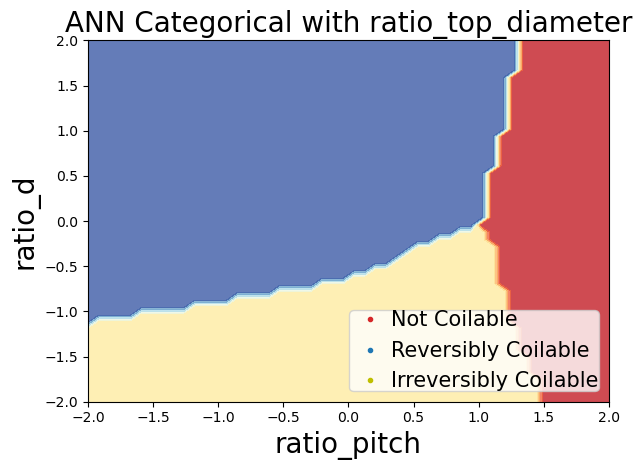

In [20]:
plt_title = "ANN Categorical with ratio_top_diameter"
n_classes = 3

plot_colors = 'ryb' # defining the 3 colors for each category
target_names = ['Not coilable','coilable','coilable but yield']

fig2, ax2 = plt.subplots(tight_layout=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax2.contourf(xv, yv, Z, cmap=cm.RdYlBu, alpha=0.8)

# Plot the training points
# ax2.scatter(X_data_inverse[temp_sample, 1], X_data_inverse[temp_sample, 0], c=plot_colors[Y_data[temp_sample]],
#                 label=(Y_data[temp_sample],X_data_inverse[temp_sample, 2]), edgecolor='black', s=15)

# ax2.set_ylim(temp_x1.min(), temp_x1.max())
# ax2.set_xlim(temp_x2.min(), temp_x2.max())
ax2.set_ylabel('ratio_d', fontsize=20)
ax2.set_xlabel('ratio_pitch', fontsize=20)
#ax2.set_xticks(())
#ax2.set_yticks(())
plt.plot([], [], ".", color="C3", label="Not Coilable")
if n_classes == 2:
    plt.plot([], [], ".", color="C0", label="Coilable")
if n_classes == 3:
    plt.plot([], [], ".", color="C0", label="Reversibly Coilable")
    plt.plot([], [], ".", color="y", label="Irreversibly Coilable")
    
ax2.legend(loc='lower right', borderpad=0, handletextpad=0, fontsize=15)
ax2.set_title(plt_title, fontsize=20)


In [ ]:
ac, rc

In [28]:
# Categorical works. Let's try regression
from sklearn.model_selection import train_test_split

testset_ratio = 0.25
SEED = 123
np.random.seed(SEED)

DS = 7
if DS == 3:
    ip = input_3
    op = output_3
else:
    ip = input_7
    op = output_7

clean_idx = op.dropna().index
X_train, X_test, y_train, y_test = train_test_split(ip.iloc[clean_idx], op.iloc[clean_idx][["sigma_crit", "energy"]].values, test_size=testset_ratio, random_state=SEED)

# # Class-dimensional y train and test
# Y_train = np.zeros([len(y_train), 3])
# for i in range(len(y_train)):
#     Y_train[i][y_train[i]] = 1
    
# Y_test = np.zeros([len(y_test), 3])
# for i in range(len(y_test)):
#     Y_test[i][y_test[i]] = 1

# Standardizing your dataset is good practice and can be important for ANNs!
from sklearn.preprocessing import StandardScaler # standardize the dataset with scikit-learn
#
scaler = StandardScaler().fit(X_train) # Check scikit-learn to see what this does!
#
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#

scaler_y = StandardScaler().fit(y_train) # Check scikit-learn to see what this does!
#
y_train_scaled=scaler_y.transform(y_train)
y_test_scaled=scaler_y.transform(y_test)

import scikeras
from scikeras.wrappers import KerasRegressor
#from tensorflow.keras import KerasRegressor # a new version will use scikeras
# Now create your first ANN model!
neurons1=64 # number of neurons for the first hidden layer
neurons2=32 # number of neurons for the second hidden layer
activation='relu' # choose activation function
batch_size = 200 # considering the entire dataset for updating the weights and biases in each epoch
epochs = 1000 # number of times we train the neural network with the entire training set
optimizer = Adam(learning_rate=0.001) # specifying the learning rate value for the optimizer (PLAY WITH THIS!)
ANN_model = KerasRegressor(model=create_ANN, input_dimensions=len(X_train.columns), neurons1=neurons1, neurons2=neurons2,
                           activation=activation, batch_size=batch_size, epochs=epochs,
                           optimizer=optimizer, output_dimensions=2)

In [29]:
# Now that we created our first ANN model, let's fit it to our (scaled) dataset!
history = ANN_model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/1000
84/84 [==============================] - 2s 10ms/step - loss: 0.4227 - val_loss: 0.1829
Epoch 2/1000
84/84 [==============================] - 0s 5ms/step - loss: 0.1520 - val_loss: 0.1260
Epoch 3/1000
84/84 [==============================] - 0s 5ms/step - loss: 0.1138 - val_loss: 0.0986
Epoch 4/1000
84/84 [==============================] - 1s 7ms/step - loss: 0.0915 - val_loss: 0.0819
Epoch 5/1000
84/84 [==============================] - 0s 5ms/step - loss: 0.0782 - val_loss: 0.0723
Epoch 6/1000
84/84 [==============================] - 0s 6ms/step - loss: 0.0693 - val_loss: 0.0650
Epoch 7/1000
84/84 [==============================] - 0s 4ms/step - loss: 0.0633 - val_loss: 0.0597
Epoch 8/1000
84/84 [==============================] - 0s 5ms/step - loss: 0.0578 - val_loss: 0.0565
Epoch 9/1000
84/84 [==============================] - 0s 4ms/step - loss: 0.0537 - val_loss: 0.0523
Epoch 10/1000
84/84 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.049

In [30]:
y_pred_scaled = history.model_.predict(X_test_scaled) # predict all data points with ANN

175/175 [==============================] - 1s 3ms/step


In [31]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [32]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print(r2)  # 7-dim = 0.9843
print(mse)  # 7 - dim = 7.818

0.9850899966593949
7.563498142505077


In [38]:
mean_squared_error(y_test, y_pred)

7.563498142505077

array([[-0.87144483,  1.46417398],
       [-0.10407639,  0.63264814],
       [-0.82977417, -0.27567129],
       ...,
       [-0.79346449, -0.54048482],
       [-0.46861608, -0.89613151],
       [-0.88504154, -0.1178001 ]])

In [47]:
mean_squared_error(y_test_scaled, scaler_y.transform(y_pred))

0.014808234866260204

In [34]:
X_test_scaled.min()

-1.8744520674984635

In [ ]:
input_3.min(), input_3.max()

In [ ]:
y_pred

In [ ]:
x1_range = (input_3.ratio_d.min(), input_3.ratio_d.max())
x2_range = (input_3.ratio_pitch.min(), input_3.ratio_pitch.max())
x3_range = (input_3.ratio_top_diameter.min(), input_3.ratio_top_diameter.max())

def nn_model_plot(x1_range, x2_range, x3_range, gridspace=50):
    
    x1 = np.linspace(x1_range[0], x1_range[1], gridspace)
    x2 = np.linspace(x2_range[0], x2_range[1], gridspace)
    mg = np.meshgrid(x1, x2)
    
    
    return x1, x2
    
mg = nn_model_plot(x1_range, x2_range, x3_range)

space = np.zeros([len(x1), len(x2), 3])
for i in range(len(x1)):
    for j in range(len(x2)):
        space[i, :, 0] = x1[i]
        space[:, j, 1] = x2[j]
        space[i, j, 2] = input_3.ratio_top_diameter.quantile(.2)
        
space = np.vstack(space)

In [ ]:
space

In [ ]:
y_pred2 = history.model_.predict(space)

yp2 = []
for yps in y_pred2:
    yp2.append(np.argmax(yps))
    
yp2 = np.array(yp2)

grid = np.zeros([len(x1), len(x2)])
for i in range(len(x1)):
    for j in range(len(x2)):
        
        grid[i, j] = yp2[j + j*i]
        
        
plt.imshow(grid)

In [ ]:
np.vstack([mg[0].ravel(), mg[1].ravel()])

In [ ]:
def regression_model_plot(X_data,Y_data, scaler_x,model,grid_num=20,problem_sigma = True):

    x1, x2, x3 = X_data[:, 0], X_data[:, 1], X_data[:,2]

    x1_data_min, x1_data_max = x1.min(), x1.max() # define min & max of feature 0
    x2_data_min, x2_data_max = x2.min(), x2.max() # define min & max of feature 0
    #x3_data_min, x3_data_max = x3.min() - 0.005, x3.max() + 0.005 # define min & max of feature 0

    #grid_num = 20
    plot_step_1 = (x1_data_max-x1_data_min)/grid_num # defining the meshgrid step size
    plot_step_2 = (x1_data_max-x1_data_min)/grid_num
    plot_step = min((plot_step_1,plot_step_2))

    X1_data_grid, X2_data_grid = np.meshgrid(np.arange(x1_data_min, x1_data_max, plot_step),
                                            np.arange(x2_data_min, x2_data_max, plot_step))

    len(np.arange(x1_data_min, x1_data_max, plot_step))
    len(np.arange(x2_data_min, x2_data_max, plot_step))

    X1_data_space = np.zeros((len(np.arange(x1_data_min, x1_data_max, plot_step)),len(np.arange(x2_data_min, x2_data_max, plot_step)),len(x3)))
    X2_data_space = np.zeros((len(np.arange(x1_data_min, x1_data_max, plot_step)),len(np.arange(x2_data_min, x2_data_max, plot_step)),len(x3)))
    X3_data_space = np.zeros((len(np.arange(x1_data_min, x1_data_max, plot_step)),len(np.arange(x2_data_min, x2_data_max, plot_step)),len(x3)))

    for i in range(len(np.arange(x1_data_min, x1_data_max, plot_step))):
        for j in range(len(np.arange(x2_data_min, x2_data_max, plot_step))):
            for k in range(len(x3)):
                X1_data_space[i,j,k] = X1_data_grid[j,i]
                X2_data_space[i,j,k] = X2_data_grid[j,i]
                X3_data_space[i,j,k] = x3[k]

    if problem_sigma == True:
        
        y_pred = history.model_.predict(X_test) # predict all data points with ANN
        yp = []
        for yps in y_pred:
            yp.append(np.argmax(yps))
            
        yp = np.array(yp)

        y_class_SVM_pred_disp = model.predict(scaler_x.transform(np.c_[X1_data_space.ravel(), X2_data_space.ravel(), X3_data_space.ravel()]))
        y_class_SVM_pred_disp_inverse = scaler_y.inverse_transform(y_class_SVM_pred_disp)

        y_class_SVM_pred_disp_grid = y_class_SVM_pred_disp_inverse[:,0].reshape(X1_data_space.shape)

        temp_sample = sample_index
        temp_disp = y_class_SVM_pred_disp_grid[:,:,temp_sample]

        temp_x1 = X1_data_space[:,:,temp_sample]
        temp_x2 = X2_data_space[:,:,temp_sample]
        temp_x3 = x3[temp_sample]

        #plot_colors = 'ryb' # defining the 3 colors for each category
        #n_classes = 3
        #target_names = ['Not coilable','coilable','coilable but yield']

        fig2, ax3 = plt.subplots(tight_layout=True)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        
        ax3.contourf(temp_x2, temp_x1, temp_disp, cmap=cm.RdYlBu, alpha=0.8)
        # Plot the training points
        ax3.scatter(X_data_inverse[temp_sample, 1], X_data_inverse[temp_sample, 0], c=Y_data_inverse[temp_sample,0],
                        label=(Y_data[temp_sample,0],X_data_inverse[temp_sample, 2]), edgecolor='black', s=15)
    else:
        y_class_SVM_pred_disp = model.predict(scaler_x.transform(np.c_[X1_data_space.ravel(), X2_data_space.ravel(), X3_data_space.ravel()]))
        y_class_SVM_pred_disp_inverse = scaler_y.inverse_transform(y_class_SVM_pred_disp)

        y_class_SVM_pred_disp_grid = y_class_SVM_pred_disp_inverse[:,1].reshape(X1_data_space.shape)

        temp_sample = sample_index
        temp_disp = y_class_SVM_pred_disp_grid[:,:,temp_sample]

        temp_x1 = X1_data_space[:,:,temp_sample]
        temp_x2 = X2_data_space[:,:,temp_sample]
        temp_x3 = x3[temp_sample]

        fig2, ax3 = plt.subplots(tight_layout=True)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        
        ax3.contourf(temp_x2, temp_x1, temp_disp, cmap=cm.RdYlBu, alpha=0.8)
        # Plot the training points
        ax3.scatter(X_data_inverse[temp_sample, 1], X_data_inverse[temp_sample, 0], c=Y_data_inverse[temp_sample,1],
                        label=(Y_data[temp_sample,1],X_data_inverse[temp_sample, 2]), edgecolor='black', s=15)

    ax3.set_ylim(temp_x1.min(), temp_x1.max())
    ax3.set_xlim(temp_x2.min(), temp_x2.max())
    ax3.set_ylabel('ratio_d', fontsize=20)
    ax3.set_xlabel('ratio_pitch', fontsize=20)
    #ax2.set_xticks(())
    #ax2.set_yticks(())
    ax3.legend(loc='lower right', borderpad=0, handletextpad=0, fontsize=15)
    ax3.set_title('Support Vector Machine Classifier (SVC) with RBF kernel with ratio_top_diameter', fontsize=20)
    fig2.colorbar(cm.ScalarMappable(norm=None, cmap=cm.RdYlBu), ax=ax3)

In [ ]:
output_7